In [ ]:
import glob
import json
import os

import numpy as np

from algorithms.utilities.Utils import Utils
from algorithms.utilities.Stats import Stats

from algorithms.classical.floodfill.FloodFill import FloodFill
from algorithms.classical.bfs.BFS import BFS
from algorithms.classical.dijkstra.Dijkstra import Dijkstra
from algorithms.classical.astar.AStar import AStar

from algorithms.reinforcement_learning.sarsa.Sarsa import Sarsa
from algorithms.reinforcement_learning.q_learning.Qlearning import QLearning
from algorithms.reinforcement_learning.dynaq.DynaQLearning import DynaQLearning
from algorithms.reinforcement_learning.dynaq.DynaQSarsa import DynaQSarsa

from algorithms.ExploreMaze import ExploreMaze
import pandas as pd

In [ ]:
maze = Utils.load_maze('mazes/competition_json/87us1.json')

In [ ]:
sarsa = DynaQLearning(walls=maze)

In [ ]:
sarsa.run_dyna_qlearning()
sarsa_path = sarsa.get_path()

In [ ]:
Utils.draw_maze(walls=maze, dist_map=sarsa.get_max_q_values(), path = sarsa_path)

running agent 1
running agent 2
running agent 3
[(0, 0), (0, 10), (0, 15), (0, 15), (1, 1), (1, 1), (1, 3), (1, 3), (1, 4), (1, 12), (2, 4), (2, 4), (2, 6), (2, 6), (3, 11), (3, 11), (3, 12), (4, 5), (4, 5), (4, 11), (4, 11), (4, 12), (5, 8), (5, 8), (6, 2), (6, 2), (6, 8), (6, 8), (6, 10), (6, 10), (6, 11), (6, 15), (6, 15), (7, 0), (7, 0), (8, 3), (8, 3), (9, 1), (9, 1), (9, 9), (10, 6), (10, 6), (12, 4), (12, 4), (12, 6), (12, 10), (12, 10), (13, 3), (13, 6), (14, 2), (14, 2), (15, 6), (15, 6), (15, 7), (15, 7), (15, 8)]


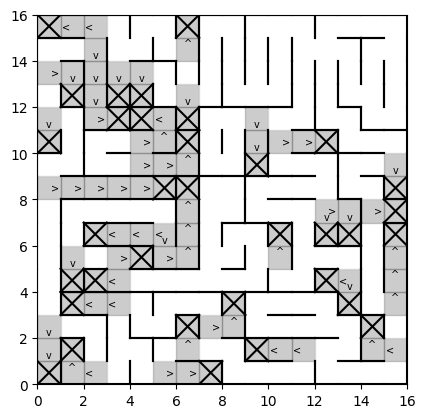

In [3]:
from algorithms.reinforcement_learning.q_learning.Qlearning import QLearning
from algorithms.utilities.Utils import Utils
maze = Utils.load_maze('mazes/competition_json/87us1.json')
dyna_qlearning = QLearning(walls=maze)
dyna_qlearning.run_qlearning()
dyna_qlearning.get_all_unfeasable()
print(dyna_qlearning.dead_ends)
# print(dyna_qlearning.unfeasable_paths)
Utils.draw_maze(maze, unfeasable=dyna_qlearning.unfeasable_paths)

In [4]:
from algorithms.utilities.Stats import Stats
stats = Stats()
stats.get_time_from_path(dyna_qlearning.path)

24.61965770154704

It is only failing when I run it to account for time taken and not with intervals. Discuss with supervisor what my next step should look like

running agent 1
running agent 2
running agent 3
[(4, (0, 0)), (2, (0, 1)), (2, (0, 2)), (2, (0, 3)), (2, (0, 4)), (2, (0, 5)), (2, (0, 6)), (2, (0, 7)), (2, (0, 8)), (2, (0, 9)), (2, (0, 10)), (2, (0, 11)), (2, (0, 12)), (3, (1, 12)), (3, (2, 12)), (4, (2, 15)), (0, (2, 14)), (4, (4, 0)), (2, (4, 1)), (4, (4, 2)), (1, (3, 2)), (4, (4, 14)), (2, (4, 15)), (4, (6, 13)), (3, (7, 13)), (4, (6, 15)), (0, (6, 14)), (4, (7, 9)), (3, (8, 9)), (4, (8, 14)), (2, (8, 15)), (4, (9, 8)), (3, (10, 8)), (3, (11, 8)), (4, (9, 12)), (0, (9, 11)), (4, (10, 15)), (0, (10, 14)), (4, (12, 11)), (2, (12, 12)), (4, (12, 14)), (2, (12, 15)), (4, (13, 3)), (2, (13, 4)), (2, (13, 5)), (4, (14, 1)), (3, (15, 1))]


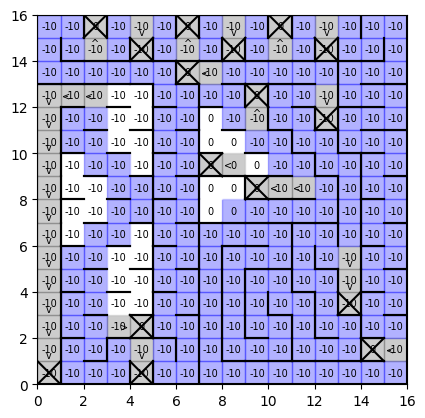

In [2]:


from algorithms.reinforcement_learning.dynaq.DynaQLearning import DynaQLearning, Utils
maze = Utils.load_maze('mazes/competition_json/torture.json')
dyna_qlearning = DynaQLearning(walls=maze)
dyna_qlearning.run_dyna_qlearning()
dyna_qlearning.get_all_unfeasible()
print(dyna_qlearning.unfeasable_paths) 
Utils.draw_maze(maze, unfeasable=dyna_qlearning.unfeasable_paths, path=dyna_qlearning.get_path(), dist_map=dyna_qlearning.get_min_q_values())

Maybe need to add something to check if an agent fails, then run another quickly

In [2]:
print(dyna_qlearning.goal_reward)

1000


In [3]:
from algorithms.utilities.Stats import Stats
stats = Stats()
stats.get_time_from_path(dyna_qlearning.path)

99.00028176549178

(65, 32)


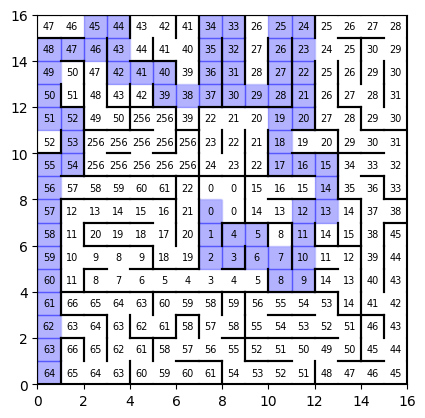

24.61965770154704


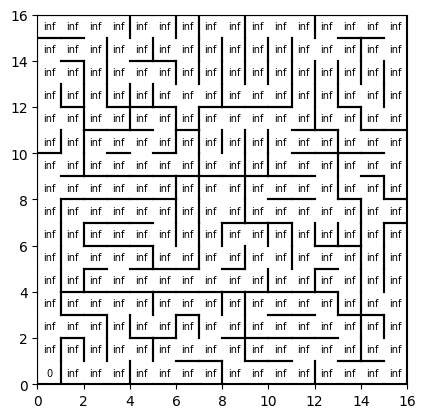

In [9]:

from algorithms.classical.floodfill.FloodFill import FloodFill
flood = FloodFill(walls=maze)
flood_path = flood.get_path_from_flood_map()
print(flood.get_stats())
Utils().draw_maze(walls=maze, path=flood_path, dist_map= flood.flood_map)
stats = Stats()
print(stats.get_time_from_path(flood_path))
map = [[float('inf') for _ in range(16)] for _ in range(16)]
goals = flood.get_goal_position()
# for goal in goals:
#     map[goal[0]][goal[1]] = 0
map[flood.start_position[0]][flood.start_position[1]] = 0
Utils.draw_maze(maze, dist_map=map)

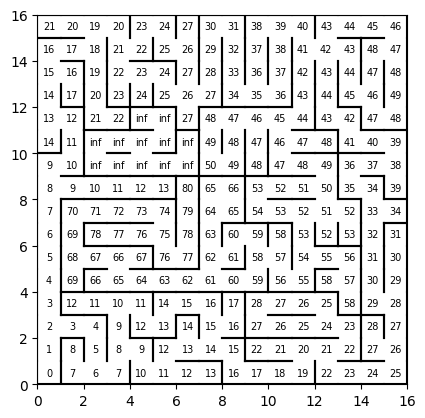

In [10]:
from algorithms.classical.bfs.BFS import BFS
bfs = BFS(walls=maze)
bfs.bfs()
Utils.draw_maze(maze, dist_map=bfs.distances)


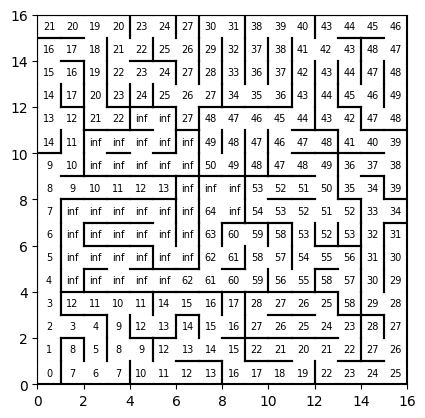

In [11]:
from algorithms.classical.astar.AStar import AStar
bfs = AStar(walls=maze)
bfs.a_star()
Utils.draw_maze(maze, dist_map=bfs.distances)

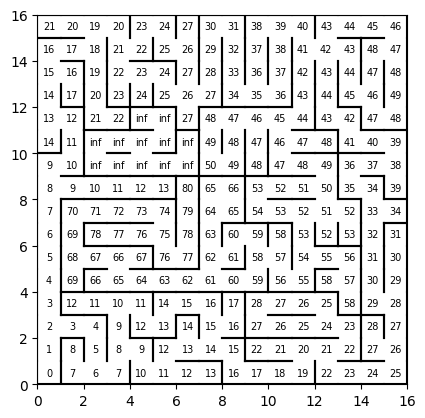

In [12]:
from algorithms.classical.dijkstra.Dijkstra import Dijkstra
bfs = Dijkstra(walls=maze)
bfs.dijkstra()
Utils.draw_maze(maze, dist_map=bfs.distances)

In [5]:
def get_mazes_json(dirname, maze_names):
    mazes = {}
    for maze_file in glob.glob(os.path.join(dirname, '*.json')):
        count = 0
        with open(maze_file, 'r') as f:
            maze_name = maze_file.split('\\')[1]
            maze_name = maze_name.split('.')[0]
            mazes[maze_name] = {eval(k): v for k, v in json.load(f).items()} 
    return mazes

In [1]:
import os
import glob
import json

def get_mazes_json(dirname, maze_names):
    mazes = {}
    for maze_file in glob.glob(os.path.join(dirname, '*.json')):
        with open(maze_file, 'r') as f:
            maze_name = maze_file.split('\\')[1]
            maze_name = maze_name.split('.')[0]
            
            if maze_name in maze_names:  # Check if this maze name is in the list of names to load
                mazes[maze_name] = {eval(k): v for k, v in json.load(f).items()}
    return mazes

# Example usage:
maze_names = [
    'apec2011', 'apec2013', 'chochi', 'cut', 'diag2', 'kyushu-2017',
    'map-2', 'map-g4', 'minos03', 'other-world85fin-1985',
    'portugal-2017-qualifier', 'solver', 'song-2', 'sundo-1', 'supo1',
    'supo2', 'supo3', 'taiwan2009f', 'torture'
]

dirname = 'mazes/competition_json'  # Replace with your directory path
loaded_mazes = get_mazes_json(dirname, maze_names)



In [2]:
loaded_mazes

{'apec2011': {(0, 0): [False, True, True, True],
  (1, 0): [False, False, True, True],
  (2, 0): [True, False, True, False],
  (3, 0): [True, False, True, False],
  (4, 0): [True, False, True, False],
  (5, 0): [True, False, True, False],
  (6, 0): [True, False, True, False],
  (7, 0): [True, False, True, False],
  (8, 0): [True, False, True, False],
  (9, 0): [True, False, True, False],
  (10, 0): [True, False, True, False],
  (11, 0): [True, False, True, False],
  (12, 0): [True, False, True, False],
  (13, 0): [True, False, True, False],
  (14, 0): [True, False, True, False],
  (15, 0): [False, True, True, False],
  (0, 1): [False, True, False, True],
  (1, 1): [False, True, False, True],
  (2, 1): [False, False, True, True],
  (3, 1): [True, False, True, False],
  (4, 1): [True, False, True, False],
  (5, 1): [True, False, True, False],
  (6, 1): [True, False, True, False],
  (7, 1): [True, False, True, False],
  (8, 1): [False, True, True, False],
  (9, 1): [False, False, True, Tr


# Changed RLSetup class, now it accounts for the time taken but the multiple is a constant low number, play with the number and test on the shitty mazes. If this works for all, run again but save on different csv files. If this works, you have your results, all you need then is to plot and write it out.

In [3]:
from algorithms.reinforcement_learning.dynaq.DynaQLearning import DynaQLearning, Utils
from algorithms.reinforcement_learning.sarsa.Sarsa import Sarsa
from algorithms.utilities.Stats import Stats
import time
def get_runtime(start_time):
    end_time = time.perf_counter_ns()
    return end_time - start_time

stats = Stats()
dyna_qlearning_paths = []
dyna_qlearning_path_times = []
dyna_qlearning_turns = []
dyna_qlearning_distances = []
dyna_qlearning_cells_travelled = []
dyna_qlearning_exec_time = []
dyna_qlearning_memory = []
# dyna_qlearning_failed = []
for name, item in loaded_mazes.items():
    print(f'\nrunning {name}')
    start_time = time.perf_counter_ns()
    dyna_qlearning = DynaQLearning(walls=item)
    dyna_qlearning.run_dyna_qlearning()
    dyna_qlearning_exec_time.append(get_runtime(start_time) * pow(10, -3))
    path = dyna_qlearning.get_path()
    dyna_qlearning_paths.append(path)
    dyna_qlearning_path_times.append(stats.get_time_from_path(path))
    dist, turns = dyna_qlearning.get_stats()
    dyna_qlearning_cells_travelled.append(dist)
    dyna_qlearning_distances.append(stats.get_dist_travelled())
    dyna_qlearning_turns.append(turns)
    dyna_qlearning_memory.append(dyna_qlearning.total_memory_used)
    # dyna_qlearning_failed.append(dyna_qlearning.fails)

maze_names = loaded_mazes.keys()

data = {
    'Maze Name': maze_names,
    'Path': dyna_qlearning_paths,
    'Path Time (s)': dyna_qlearning_path_times,
    'Turns': dyna_qlearning_turns,
    'Distance Travelled (m)': dyna_qlearning_distances,
    'Execution Time (micro secs)': dyna_qlearning_exec_time,
    'Memory Usage (MB)': dyna_qlearning_memory,
    'Cells Travelled': dyna_qlearning_cells_travelled
    # 'Failed To Use Equations of Motion': dyna_qlearning_failed
}


running apec2011
running agent 1
running agent 2
running agent 3

running apec2013
running agent 1
running agent 2
running agent 3
agent: 3 failed
running agent 4

running chochi
running agent 1
running agent 2
running agent 3

running cut
running agent 1
running agent 2
running agent 3

running diag2
running agent 1
running agent 2
running agent 3

running kyushu-2017
running agent 1
running agent 2
running agent 3

running map-2
running agent 1
running agent 2
running agent 3

running map-g4
running agent 1
running agent 2
running agent 3

running minos03
running agent 1
running agent 2
running agent 3

running other-world85fin-1985
running agent 1
running agent 2
running agent 3

running portugal-2017-qualifier
running agent 1
running agent 2
running agent 3

running solver
running agent 1
running agent 2
running agent 3

running song-2
running agent 1
running agent 2
running agent 3

running sundo-1
running agent 1
running agent 2
running agent 3

running supo1
running agent 1
run

In [4]:
import pandas as pd
data_df_q = pd.DataFrame(data).set_index('Maze Name')


C:\Users\ACER\AppData\Local\Temp\ipykernel_21096\1015402274.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [5]:
maze_names = [
    'apec2011', 'apec2013', 'chochi', 'cut', 'diag2', 'kyushu-2017',
    'map-2', 'map-g4', 'minos03', 'other-world85fin-1985',
    'portugal-2017-qualifier', 'solver', 'song-2', 'sundo-1', 'supo1',
    'supo2', 'supo3', 'taiwan2009f', 'torture'
]

In [6]:
data_df_q

,Path,Path Time (s),Turns,Distance Travelled (m),Execution Time (micro secs),Memory Usage (MB),Cells Travelled
Maze Name,,,,,,,
apec2011,"[(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5...",39.750112,0,20.43,9679685.4,0.000000,115
apec2013,"[(0, 0), (0, 1), (0, 2), (1, 2), (1, 3), (1, 4...",50.754414,0,23.31,24746847.5,0.000000,131
chochi,"[(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5...",30.327489,0,15.03,9887934.5,0.000000,85
cut,"[(0, 0), (0, 1), (0, 2), (1, 2), (2, 2), (2, 1...",36.621558,0,19.71,28521026.0,0.000000,117
diag2,"[(0, 0), (0, 1), (1, 1), (1, 0), (2, 0), (3, 0...",32.737654,0,11.79,4599654.9,0.000000,67
kyushu-2017,"[(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (1, 4...",35.626155,0,20.25,4296587.7,0.000000,116
map-2,"[(0, 0), (0, 1), (1, 1), (1, 0), (2, 0), (2, 1...",49.188195,0,20.25,5958144.4,0.000000,114
map-g4,"[(0, 0), (0, 1), (0, 2), (1, 2), (2, 2), (2, 1...",17.370226,0,8.37,6349157.8,0.000000,48
minos03,"[(0, 0), (0, 1), (0, 2), (1, 2), (1, 1), (2, 1...",18.208260,0,10.53,5538407.2,0.000000,66


In [1]:
import os
import glob
import json

def get_mazes_json(dirname, maze_names):
    mazes = {}
    for maze_file in glob.glob(os.path.join(dirname, '*.json')):
        with open(maze_file, 'r') as f:
            maze_name = maze_file.split('\\')[1]
            maze_name = maze_name.split('.')[0]
            
            if maze_name in maze_names:  # Check if this maze name is in the list of names to load
                mazes[maze_name] = {eval(k): v for k, v in json.load(f).items()}
    return mazes

# Example usage:
maze_names = [
    'apec2011', 'apec2013', 'chochi', 'cut', 'diag2', 'kyushu-2017',
    'map-2', 'map-g4', 'minos03', 'other-world85fin-1985',
    'portugal-2017-qualifier', 'solver', 'song-2', 'sundo-1', 'supo1',
    'supo2', 'supo3', 'taiwan2009f', 'torture'
]

dirname = 'mazes/competition_json'  # Replace with your directory path
loaded_mazes = get_mazes_json(dirname, maze_names)


from algorithms.reinforcement_learning.dynaq.DynaQSarsa import DynaQSarsa
from algorithms.utilities.Stats import Stats
from algorithms.utilities.Utils import Utils
import time
def get_runtime(start_time):
    end_time = time.perf_counter_ns()
    return end_time - start_time

stats = Stats()
dyna_qlearning_paths = []
dyna_qlearning_path_times = []
dyna_qlearning_turns = []
dyna_qlearning_distances = []
dyna_qlearning_cells_travelled = []
dyna_qlearning_exec_time = []
dyna_qlearning_memory = []
# dyna_qlearning_failed = []
for name, item in loaded_mazes.items():
    print(f'\nrunning {name}')
    start_time = time.perf_counter_ns()
    dyna_qlearning = DynaQSarsa(walls=item)
    dyna_qlearning.run_dyna_sarsa()
    dyna_qlearning_exec_time.append(get_runtime(start_time) * pow(10, -3))
    path = dyna_qlearning.get_path()
    dyna_qlearning_paths.append(path)
    dyna_qlearning_path_times.append(stats.get_time_from_path(path))
    dist, turns = dyna_qlearning.get_stats()
    dyna_qlearning_cells_travelled.append(dist)
    dyna_qlearning_distances.append(stats.get_dist_travelled())
    dyna_qlearning_turns.append(turns)
    dyna_qlearning_memory.append(dyna_qlearning.total_memory_used)
    # dyna_qlearning_failed.append(dyna_qlearning.fails)

maze_names = loaded_mazes.keys()

data_s = {
    'Maze Name': maze_names,
    'Path': dyna_qlearning_paths,
    'Path Time (s)': dyna_qlearning_path_times,
    'Turns': dyna_qlearning_turns,
    'Distance Travelled (m)': dyna_qlearning_distances,
    'Execution Time (micro secs)': dyna_qlearning_exec_time,
    'Memory Usage (MB)': dyna_qlearning_memory,
    'Cells Travelled': dyna_qlearning_cells_travelled,
    # 'Failed To Use Equations of Motion': dyna_qlearning_failed
}


running apec2011
running agent 1
running agent 2
running agent 3

running apec2013
running agent 1
running agent 2
running agent 3

running chochi
running agent 1
running agent 2
running agent 3

running cut
running agent 1
running agent 2
running agent 3

running diag2
running agent 1
running agent 2
running agent 3

running kyushu-2017
running agent 1
running agent 2
running agent 3

running map-2
running agent 1
running agent 2
agent: 2 failed
running agent 3
agent: 3 failed
running agent 4
running agent 5

running map-g4
running agent 1
running agent 2
running agent 3

running minos03
running agent 1
running agent 2
running agent 3

running other-world85fin-1985
running agent 1
running agent 2
running agent 3

running portugal-2017-qualifier
running agent 1
running agent 2
running agent 3

running solver
running agent 1
running agent 2
running agent 3

running song-2
running agent 1
running agent 2
running agent 3

running sundo-1
running agent 1
running agent 2
running agent 3

r

In [2]:
import pandas as pd
data = {
    'Maze Name': maze_names,
    'Path': dyna_qlearning_paths,
    'Path Time (s)': dyna_qlearning_path_times,
    'Turns': dyna_qlearning_turns,
    'Distance Travelled (m)': dyna_qlearning_distances,
    'Execution Time (micro secs)': dyna_qlearning_exec_time,
    'Memory Usage (MB)': dyna_qlearning_memory,
    'Cells Travelled': dyna_qlearning_cells_travelled}

data_df_s = pd.DataFrame(data_s).set_index('Maze Name')

maze_names = [
    'apec2011', 'apec2013', 'chochi', 'cut', 'diag2', 'kyushu-2017',
    'map-2', 'map-g4', 'minos03', 'other-world85fin-1985',
    'portugal-2017-qualifier', 'solver', 'song-2', 'sundo-1', 'supo1',
    'supo2', 'supo3', 'taiwan2009f', 'torture'
]

C:\Users\ACER\AppData\Local\Temp\ipykernel_32780\1108460687.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [8]:
data_df_q['Path Time (s)'].mean()

37.6801298328167

In [4]:
data_df_s['Path Time (s)'].mean()

38.48853385576617

In [1]:
import glob
import json
import os

from algorithms.utilities.Utils import Utils
from algorithms.utilities.Stats import Stats

from algorithms.classical.floodfill.FloodFill import FloodFill
from algorithms.classical.bfs.BFS import BFS
from algorithms.classical.dijkstra.Dijkstra import Dijkstra
from algorithms.classical.astar.AStar import AStar

from algorithms.reinforcement_learning.sarsa.Sarsa import Sarsa
from algorithms.reinforcement_learning.q_learning.Qlearning import QLearning
from algorithms.reinforcement_learning.dynaq.DynaQLearning import DynaQLearning
from algorithms.reinforcement_learning.dynaq.DynaQSarsa import DynaQSarsa

from algorithms.ExploreMaze import ExploreMaze
import pandas as pd

maze = Utils.load_maze('mazes/competition_json/alljapan-031-2010-exp-fin.json')


def get_mazes_json(dirname):
    mazes = {}
    for maze_file in glob.glob(os.path.join(dirname, '*.json')):
        with open(maze_file, 'r') as f:
            maze_name = maze_file.split('\\')[1]
            maze_name = maze_name.split('.')[0]
            mazes[maze_name] = {eval(k): v for k, v in json.load(f).items()}
    return mazes


mazes = get_mazes_json('mazes/competition_json')
import time


def get_runtime(start_time):
    end_time = time.perf_counter_ns()
    return end_time - start_time


remove_mazes = []
for name, item in mazes.items():
    try:
        flood = FloodFill(walls=item)
        path = flood.get_path_from_flood_map()
    except Exception as e:
        remove_mazes.append(name)

for name in remove_mazes:
    del mazes[name]

C:\Users\ACER\AppData\Local\Temp\ipykernel_18420\4182106061.py:19: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


KeyboardInterrupt: 

In [ ]:
stats = Stats()
sarsa_paths = []
sarsa_path_times = []
sarsa_turns = []
sarsa_distances = []
sarsa_cells_travelled = []
sarsa_exec_time = []
sarsa_memory = []
for name, item in mazes.items():
    print(f'running {name}')
    start_time = time.perf_counter_ns()
    sarsa = Sarsa(walls=item)
    sarsa.run_sarsa()
    sarsa_exec_time.append(get_runtime(start_time) * pow(10, -3))
    path = sarsa.get_path()
    sarsa_paths.append(path)
    sarsa_path_times.append(stats.get_time_from_path(path))
    dist, turns = sarsa.get_stats()
    sarsa_cells_travelled.append(dist)
    sarsa_distances.append(stats.get_dist_travelled())
    sarsa_turns.append(turns)
    sarsa_memory.append(sarsa.total_memory_used)

maze_names = mazes.keys()

data = {
    'Maze Name': maze_names,
    'Path': sarsa_paths,
    'Path Time (s)': sarsa_path_times,
    'Turns': sarsa_turns,
    'Distance Travelled (m)': sarsa_distances,
    'Execution Time (micro secs)': sarsa_exec_time,
    'Memory Usage (MB)': sarsa_memory,
    'Cells Travelled': sarsa_cells_travelled
}

sarsa_df = pd.DataFrame(data).set_index('Maze Name')
sarsa_df.to_csv('results/csv_files/competition/sarsa_using_arbitrary.csv')

In [4]:
stats = Stats()
qlearning_paths = []
qlearning_path_times = []
qlearning_turns = []
qlearning_distances = []
qlearning_cells_travelled = []
qlearning_exec_time = []
qlearning_memory = []
for name, item in mazes.items():
    print(f'running {name}')
    start_time = time.perf_counter_ns()
    qlearning = QLearning(walls=item)
    qlearning.run_qlearning()
    qlearning_exec_time.append(get_runtime(start_time) * pow(10, -3))
    path = qlearning.get_path()
    qlearning_paths.append(path)
    qlearning_path_times.append(stats.get_time_from_path(path))
    dist, turns = qlearning.get_stats()
    qlearning_cells_travelled.append(dist)
    qlearning_distances.append(stats.get_dist_travelled())
    qlearning_turns.append(turns)
    qlearning_memory.append(qlearning.total_memory_used)

maze_names = mazes.keys()

data = {
    'Maze Name': maze_names,
    'Path': qlearning_paths,
    'Path Time (s)': qlearning_path_times,
    'Turns': qlearning_turns,
    'Distance Travelled (m)': qlearning_distances,
    'Execution Time (micro secs)': qlearning_exec_time,
    'Memory Usage (MB)': qlearning_memory,
    'Cells Travelled': qlearning_cells_travelled
}

qlearning_df = pd.DataFrame(data).set_index('Maze Name')
qlearning_df.to_csv('results/csv_files/competition/qlearning_using_arbitrary.csv')

running 13ye
running agent 1
running agent 2
running agent 3
running 50
running agent 1
running agent 2
running agent 3
running 86
running agent 1
running agent 2
running agent 3
running 87sin
running agent 1
running agent 2
running agent 3
running 87us1
running agent 1
running agent 2
running agent 3
running 88
running agent 1
running agent 2
running agent 3
running a
running agent 1
running agent 2
running agent 3
running AAMC15Maze
running agent 1
running agent 2
running agent 3
running AAMC16Maze
running agent 1
running agent 2
running agent 3
running AAMC17Maze
running agent 1
running agent 2
running agent 3
running AAMC18Maze
running agent 1
running agent 2
running agent 3
running AAMC22Maze
running agent 1
running agent 2
running agent 3
running AAMC23Maze
running agent 1
running agent 2
running agent 3
running AAMC24Maze
running agent 1
running agent 2
running agent 3
running AAMCUCLAMM2018
running agent 1
running agent 2
running agent 3
running allamerica2013
running agent 1
r

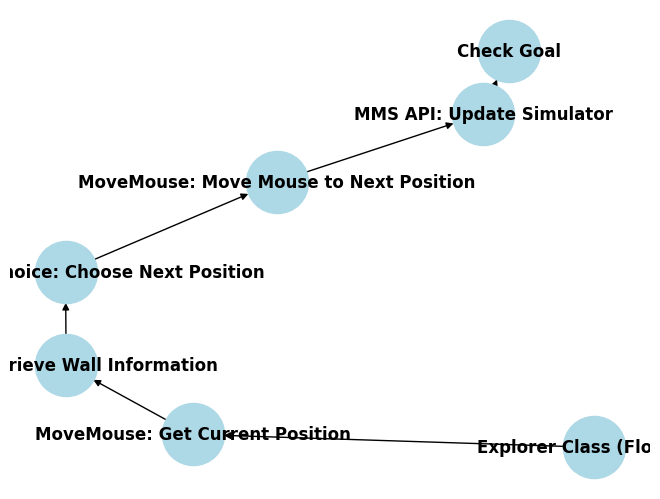

In [4]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a directed graph
G = nx.DiGraph()

# Add nodes
G.add_node('Explorer Class (FloodFill)')
G.add_node('MoveMouse: Get Current Position')
G.add_node('Walls: Retrieve Wall Information')
G.add_node('Algorithm of Choice: Choose Next Position')
G.add_node('MoveMouse: Move Mouse to Next Position')
G.add_node('MMS API: Update Simulator')
G.add_node('Check Goal')

# Add edges
G.add_edges_from([
    ('Explorer Class (FloodFill)', 'MoveMouse: Get Current Position'),
    ('MoveMouse: Get Current Position', 'Walls: Retrieve Wall Information'),
    ('Walls: Retrieve Wall Information', 'Algorithm of Choice: Choose Next Position'),
    ('Algorithm of Choice: Choose Next Position', 'MoveMouse: Move Mouse to Next Position'),
    ('MoveMouse: Move Mouse to Next Position', 'MMS API: Update Simulator'),
    ('MMS API: Update Simulator', 'Check Goal'),
])

# Draw the graph
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightblue', font_weight='bold', node_size=2000)
plt.show()
